# Will They Claim It?

## Analysis of Travel Insurance Data

#### Problem Statement
***
SafeTravel Inc. is one of the world's largest insurance companies specializing in travel insurance. During travel, there are a lot of risk factors - loss of baggage, airline cancellations, health issues, etc. 

- For an insurance company, the forecasting of claims is important for successful operation. 
- Insurance companies take risks over customers. 
    - Risk management is an integral aspect of the insurance industry.
- If the claims can be forecasted precisely and accurately, premiums can be adjusted accordingly, thereby creating the opportunity to be one step ahead of the competitors. 
- Insurers consider every factor to create profiles of high and low insurance risks. 
- Charging a lower premium than the competitors, while simultaneously maintaining a sufficient buffer to make profit, leads to more customers, which in turn leads to more profit. 
- Insurers collect information about policyholders and then analyze the data.


Our objective is to help the underwriting team in Safe Travel, Inc. to predict whether a new buyer will make the claim or not:
- This will eventually help to determine the premium for the buyer and the extent of coverage for the buyer
- It will also help to devise new travel insurance products that would help get more customers on board

#### Stakeholders and who will benefit from the analysis and findings?
***
- CEO
- Finance Department 
- Processing Department
- Insurance Underwriter
    - Insurance underwriters are professionals who evaluate and analyze the risks involved in insuring people and assets. 
    - Insurance underwriters establish pricing for accepted insurable risks. 
    - The term underwriting means receiving remuneration for the willingness to pay a potential risk. 
    - Underwriters use specialized software and actuarial data to determine the likelihood and magnitude of a risk.


#### Data Science Problem
***
- To predict if a new buyer will make the claim or not basis the given data
- Accurately forecasting insurance claims helps insurance companies to improve their pricing model. Applying the correct methods can help insurance companies to be one step ahead of their competitors, which can result in more clients which in turn can lead to more profit.


#### Data Science Metric
***
##### Precision Score
- Precision is a metric that quantifies the number of correct positive predictions made.
- For every predicted class, it is the fraction of the correct predictions to the total number of predictions for that class. - - It answers the question of all the values predicted as belonging to the class "X", what percentage is correct? 

Mathematically,
Precision(P) = TP/(TP + FP)

We are trying to reduce the number of instances where we have predicted that a person will claimed insurance(Target = 1) but he has not claimed(Target = 0).


In [1]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import TomekLinks
from sklearn.tree import DecisionTreeClassifier 

In [2]:
# Reading training data
df_train_ms = pd.read_csv('../data/train.csv')

In [3]:
# Exploring the training data
df_train_ms.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0


In [4]:
df_train_ms.shape

(52310, 11)

In [5]:
df_train_ms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52310 entries, 0 to 52309
Data columns (total 11 columns):
ID                      52310 non-null int64
Agency                  52310 non-null object
Agency Type             52310 non-null object
Distribution Channel    52310 non-null object
Product Name            52310 non-null object
Duration                52310 non-null int64
Destination             52310 non-null object
Net Sales               52310 non-null float64
Commision (in value)    52310 non-null float64
Age                     52310 non-null int64
Claim                   52310 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 4.4+ MB


In [6]:
df_train_ms.describe()

,ID,Duration,Net Sales,Commision (in value),Age,Claim
count,52310.000000,52310.000000,52310.000000,52310.000000,52310.000000,52310.000000
mean,6005.745804,58.256108,48.554673,12.219963,39.555725,0.166699
std,2306.450475,109.138708,60.198589,22.847645,13.762473,0.372710
min,2000.000000,-2.000000,-389.000000,0.000000,0.000000,0.000000
25%,4015.000000,10.000000,19.800000,0.000000,33.000000,0.000000
50%,6002.000000,24.000000,29.500000,0.000000,36.000000,0.000000
75%,8004.000000,57.000000,55.000000,13.380000,43.000000,0.000000
max,10000.000000,4881.000000,682.000000,262.760000,118.000000,1.000000


In [7]:
df_train_ms.skew()

ID                      -0.001854
Duration                15.352524
Net Sales                2.811837
Commision (in value)     3.535694
Age                      2.947891
Claim                    1.788598
dtype: float64

### Findings after exploring the data
- There are no NULL values in the training dataset
- Columns Duration, Net Sales and Commission(in value) are Right Skewed
- There are 5 numerical columns and 5 categorical columns

In [8]:
# Dropping ID column
df_train_ms.drop('ID',1,inplace = True)

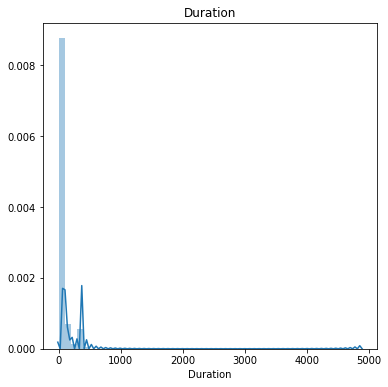

In [9]:
# Plotting Duration
plt.figure(figsize = (6,6))
sns.distplot(df_train_ms['Duration'],kde=True)
plt.title('Duration')
plt.show()

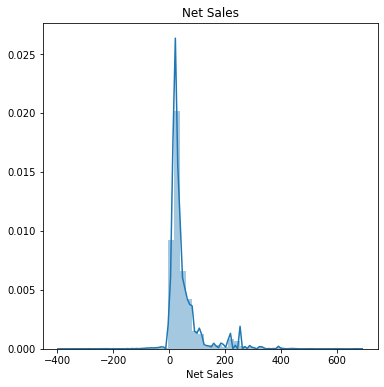

In [10]:
# Plotting Net Sales
plt.figure(figsize = (6,6))
sns.distplot(df_train_ms['Net Sales'],kde=True)
plt.title('Net Sales')
plt.show()

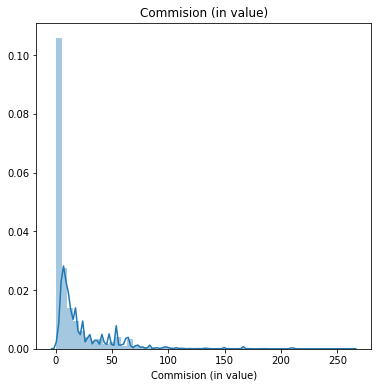

In [11]:
# Plotting Commission
plt.figure(figsize = (6,6))
sns.distplot(df_train_ms['Commision (in value)'],kde=True)
plt.title('Commision (in value)')
plt.show()

In [12]:
# Negative values of duration(Outlier detection)
df_train_ms[df_train_ms['Duration'] < 0]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
11523,JZI,Airlines,Online,Basic Plan,-1,INDONESIA,18.0,6.3,118,0
15949,JZI,Airlines,Online,Basic Plan,-1,BRUNEI DARUSSALAM,18.0,6.3,118,0
33398,JZI,Airlines,Online,Basic Plan,-1,MALAYSIA,18.0,6.3,118,0
41424,JZI,Airlines,Online,Basic Plan,-2,BANGLADESH,22.0,7.7,118,0


In [13]:
# Replacing the negative values in Duration with 0(Outlier Correction)
df_train_ms.Duration.replace(-1,0, inplace = True)
df_train_ms.Duration.replace(-2,0, inplace = True)

In [14]:
# Getting data about claims made
df_train_ms['Claim'].value_counts()

0    43590
1     8720
Name: Claim, dtype: int64

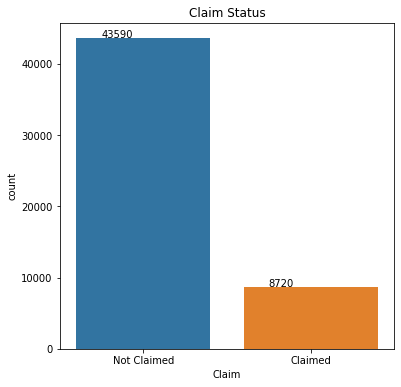

In [15]:
# Plotting Claim data
plt.figure(figsize = (6,6))
ax = sns.countplot(df_train_ms['Claim'])
plt.xticks((0, 1), ('Not Claimed', 'Claimed'), rotation='horizontal')

# Displaying the count on top of the bar
for count in ax.patches:
        ax.annotate('{:}'.format(count.get_height()), (count.get_x()+0.15, count.get_height()+75))

plt.title('Claim Status')
plt.show()

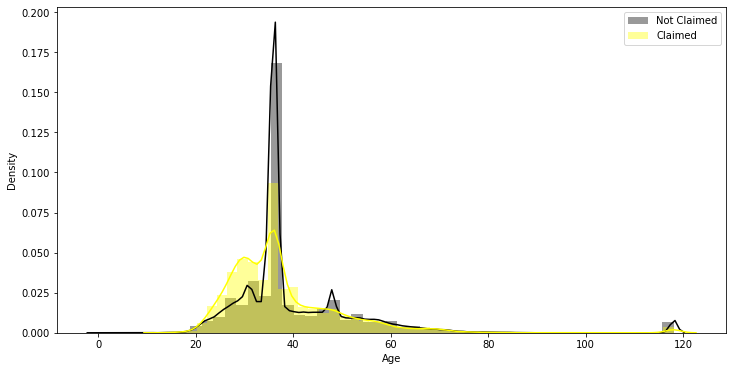

In [16]:
plt.figure(figsize = (12,6))
sns.distplot(df_train_ms[df_train_ms.Claim == 0].Age, color ='black', label = 'Not Claimed', kde=True)
sns.distplot(df_train_ms[df_train_ms.Claim == 1].Age, color ='yellow', label = 'Claimed', kde= True)
plt.ylabel('Density')
plt.legend()

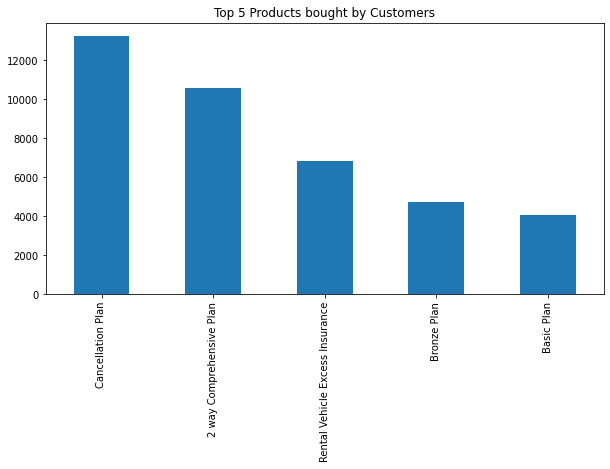

<Figure size 432x288 with 0 Axes>

In [17]:
# Products bought by customers
plt.figure(figsize = (10,5))
df_train_ms['Product Name'].value_counts().head().plot(kind='bar', figsize=(10, 5))
plt.title('Top 5 Products bought by Customers')
plt.show()
plt.savefig('fig1.png')

Text(0.5, 1.0, 'Top 5 Agencies preferred by customers')

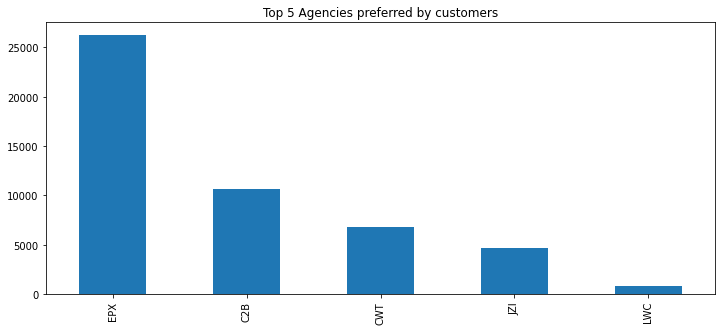

In [18]:
# Agencies preferred by customers
plt.figure(figsize = (12,5))
df_train_ms['Agency'].value_counts().head().plot(kind='bar')
plt.title("Top 5 Agencies preferred by customers")

In [19]:
# One- hot encoding categorical features
ohe_columns = df_train_ms.select_dtypes('object').columns.tolist()
for ohe in ohe_columns:
    df_train_ms = pd.concat((df_train_ms,pd.get_dummies(df_train_ms[ohe])),1)
    df_train_ms.drop(ohe,1,inplace = True)
df_train_ms

,Duration,Net Sales,Commision (in value),Age,Claim,ADM,ART,C2B,CBH,CCR,...,TURKMENISTAN,UKRAINE,UNITED ARAB EMIRATES,UNITED KINGDOM,UNITED STATES,UZBEKISTAN,VANUATU,VENEZUELA,VIET NAM,ZAMBIA
0,61,12.000000,0.0000,41,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,17.000000,0.0000,35,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,19.800000,11.8800,47,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,27.000000,0.0000,48,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,15,37.000000,0.0000,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52305,365,444.750593,111.1858,40,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
52306,8,23.000000,9.2000,54,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52307,38,61.100000,15.2800,37,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
52308,2,10.000000,0.0000,46,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# Removing skewness in Duration column
df_train_ms.loc[:,'Duration'] = np.power(df_train_ms.Duration, 0.15)

In [21]:
# Removing skewness in Net Sales column
power = 0.25
Net_sales_value = df_train_ms.index
for index in Net_sales_value:
    # For negative values we take the absolute of that value, then transform it using power and add negative sign again
    if df_train_ms.loc[index,'Net Sales'] < 0:
        df_train_ms.loc[index,'Net Sales'] = -np.power(abs(df_train_ms.loc[index,'Net Sales']), power)
    else:
        df_train_ms.loc[index,'Net Sales'] = np.power(df_train_ms.loc[index,'Net Sales'], power)

In [22]:
# Removing skewness in Commission column
df_train_ms.loc[:,'Commision (in value)'] = np.power(df_train_ms['Commision (in value)'], 0.3)

In [23]:
# Checking skewness after transformation
df_train_ms.skew()

Duration                  0.543386
Net Sales                -2.172115
Commision (in value)      0.493469
Age                       2.947891
Claim                     1.788598
                           ...    
UZBEKISTAN               80.846305
VANUATU                 132.040398
VENEZUELA               114.347059
VIET NAM                  6.358985
ZAMBIA                  228.713795
Length: 147, dtype: float64

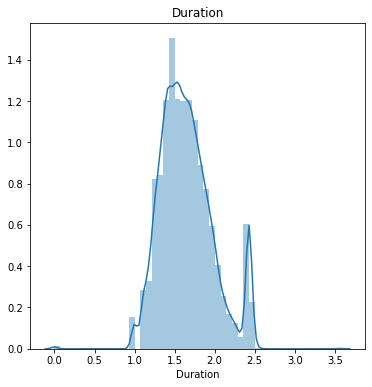

In [24]:
# Plotting Duration
plt.figure(figsize = (6,6))
sns.distplot(df_train_ms['Duration'],kde=True)
plt.title('Duration')
plt.show()

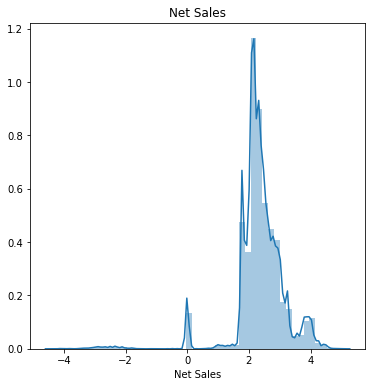

In [25]:
# Plotting Net Sales
plt.figure(figsize = (6,6))
sns.distplot(df_train_ms['Net Sales'],kde=True)
plt.title('Net Sales')
plt.show()

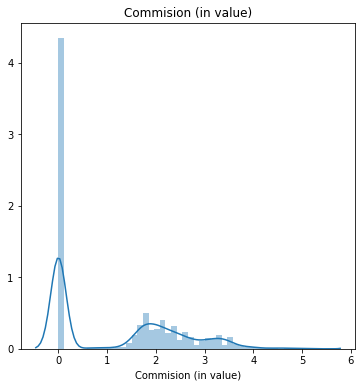

In [26]:
# Plotting Commission
plt.figure(figsize = (6,6))
sns.distplot(df_train_ms['Commision (in value)'],kde=True)
plt.title('Commision (in value)')
plt.show()

### Model Building without applying undersampling or oversampling

#### Logistic Regression

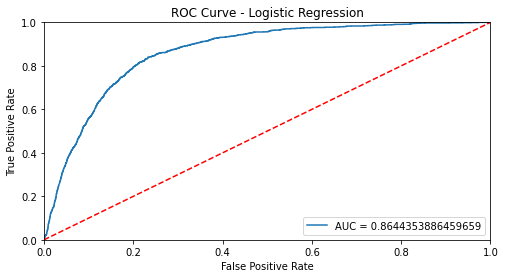

AUC score = 0.864
Precision Score: 0.42186588921282797
Accuracy: 0.7824507742305487
Recall Score: 0.8316091954022988
Confusion Matrix: 
 [[6739 1983]
 [ 293 1447]]


In [27]:
X = df_train_ms.drop('Claim',1)
y = df_train_ms.Claim

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0, test_size = 0.20)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# fit the model
model = LogisticRegression(solver = 'liblinear', random_state=0, class_weight ='balanced',max_iter=1000)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

# Plot ROC curve
false_pr, true_pr, threshold = roc_curve(y_test, y_prob[:,1])
plt.figure(figsize=(8,4))

# Calculate AUC score
auc = roc_auc_score(y_test, y_prob[:,1])
plt.plot(false_pr, true_pr,label="AUC = {}".format(auc))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()


print('AUC score = %.3f' % auc) 
print('Precision Score:', precision_score(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Recall Score:', recall_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

#### Decision Tree Classifier

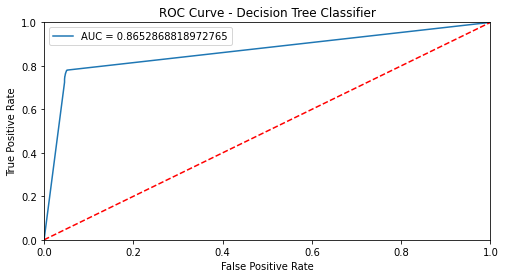

AUC score = 0.865
Precision Score: 0.7604107244723332
Accuracy: 0.9209520168227873
Recall Score: 0.7660919540229885
Confusion Matrix: 
 [[8302  420]
 [ 407 1333]]


In [28]:
X = df_train_ms.drop('Claim',1)
y = df_train_ms.Claim

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0, test_size = 0.20)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# fit the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

# Plot ROC curve
false_pr, true_pr, threshold = roc_curve(y_test, y_prob[:,1])
plt.figure(figsize=(8,4))

# Calculate AUC score
auc = roc_auc_score(y_test, y_prob[:,1])
plt.plot(false_pr, true_pr,label="AUC = {}".format(auc))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree Classifier")
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()


print('AUC score = %.3f' % auc) 
print('Precision Score:', precision_score(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Recall Score:', recall_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

#### K-NN Classifier

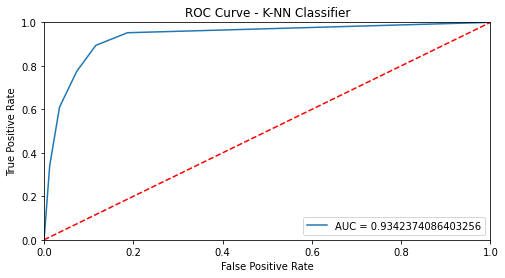

AUC score = 0.934
Precision Score: 0.6787512588116817
Accuracy: 0.9015484610973046
Recall Score: 0.774712643678161
Confusion Matrix: 
 [[8084  638]
 [ 392 1348]]


In [29]:
from sklearn.neighbors import KNeighborsClassifier
X = df_train_ms.drop('Claim',1)
y = df_train_ms.Claim

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0, test_size = 0.20)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# fit the model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

# Plot ROC curve
false_pr, true_pr, threshold = roc_curve(y_test, y_prob[:,1])
plt.figure(figsize=(8,4))

# Calculate AUC score
auc = roc_auc_score(y_test, y_prob[:,1])
plt.plot(false_pr, true_pr,label="AUC = {}".format(auc))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - K-NN Classifier")
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()


print('AUC score = %.3f' % auc) 
print('Precision Score:', precision_score(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Recall Score:', recall_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

#### Random Forest

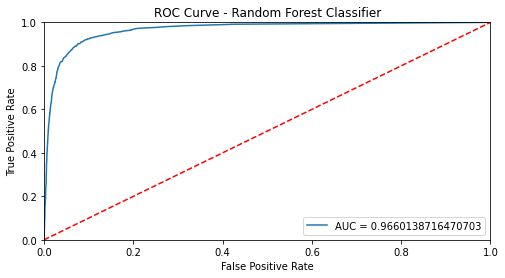

AUC score = 0.966
Precision Score: 0.8351648351648352
Accuracy: 0.9386350602179315
Recall Score: 0.7862068965517242
Confusion Matrix: 
 [[8452  270]
 [ 372 1368]]


In [30]:
# Model Building using normal Random Forest Classifier
X = df_train_ms.drop('Claim',1)
y = df_train_ms.Claim

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0, test_size = 0.20)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# fit the model
model = RandomForestClassifier(random_state = 0)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

# Plot ROC curve
false_pr, true_pr, threshold = roc_curve(y_test, y_prob[:,1])
plt.figure(figsize=(8,4))

# Calculate AUC score
auc = roc_auc_score(y_test, y_prob[:,1])
plt.plot(false_pr, true_pr,label="AUC = {}".format(auc))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest Classifier")
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()


print('AUC score = %.3f' % auc) 
print('Precision Score:', precision_score(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Recall Score:', recall_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

### Model Building using Undersampling and Oversampling

##### Undersampling

In [31]:
# NearMiss-1: Majority class examples with minimum average distance to three closest minority class examples. - 0.875
undersample = NearMiss(version=1, n_neighbors=5)

# NearMiss-3: Majority class examples with minimum distance to each minority class example. - 0.80
#undersample = NearMiss(version=3, n_neighbors=5)

X_us, y_us = undersample.fit_resample(X, y)

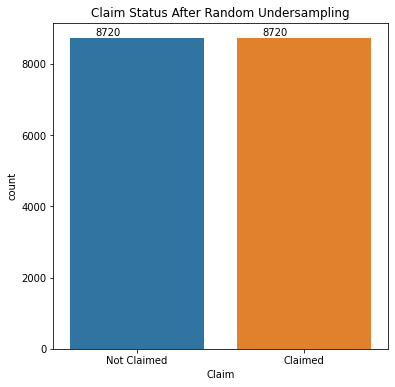

In [32]:
plt.figure(figsize = (6,6))
ax = sns.countplot(y_us)
plt.xticks((0, 1), ('Not Claimed', 'Claimed'), rotation='horizontal')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+75))
plt.title('Claim Status After Random Undersampling')
plt.show()

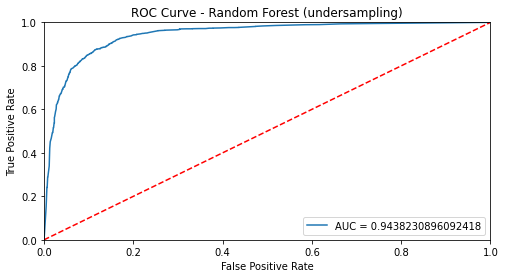

AUC score = 0.944
Precision Score: 0.869467787114846
Accuracy: 0.8758600917431193
Recall Score: 0.8858447488584474
Confusion Matrix: 
 [[1503  233]
 [ 200 1552]]


In [33]:
# Model building using Random Forest but by performing Random Under-Sampling on the training data 
X = df_train_ms.drop('Claim',1)
y = df_train_ms.Claim

# Using over-sampled data for training the model
X_train,X_test,y_train,y_test = train_test_split(X_us,y_us,random_state = 0, test_size = 0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# fit the model
model = RandomForestClassifier(random_state = 0)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

# Plot ROC curve
false_pr, true_pr, threshold = roc_curve(y_test, y_prob[:,1])
plt.figure(figsize=(8,4))

# Calculate AUC score
auc = roc_auc_score(y_test, y_prob[:,1])
plt.plot(false_pr, true_pr,label="AUC = {}".format(auc))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest (undersampling)")
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()


print('AUC score = %.3f' % auc) 
print('Precision Score:', precision_score(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Recall Score:', recall_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

##### Oversampling

In [34]:
#Oversampling
over_sampling = RandomOverSampler(random_state=0)
X_os, y_os = over_sampling.fit_resample(X, y)

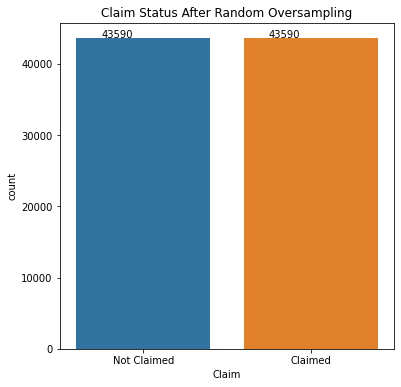

In [35]:
plt.figure(figsize = (6,6))
ax = sns.countplot(y_os)
plt.xticks((0, 1), ('Not Claimed', 'Claimed'), rotation='horizontal')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+75))
plt.title('Claim Status After Random Oversampling')
plt.show()

#### Logistic Regression

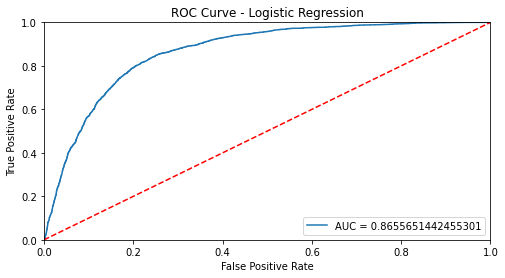

AUC score = 0.866
Precision Score: 0.7786430552592276
Accuracy: 0.7984055976141317
Recall Score: 0.835221421215242
Confusion Matrix: 
 [[6622 2075]
 [1440 7299]]


In [36]:
X = df_train_ms.drop('Claim',1)
y = df_train_ms.Claim

X_train,X_test,y_train,y_test = train_test_split(X_os,y_os,random_state = 0, test_size = 0.20)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# fit the model
model = LogisticRegression(solver = 'liblinear', random_state=0, class_weight ='balanced',max_iter=1000)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

# Plot ROC curve
false_pr, true_pr, threshold = roc_curve(y_test, y_prob[:,1])
plt.figure(figsize=(8,4))

# Calculate AUC score
auc = roc_auc_score(y_test, y_prob[:,1])
plt.plot(false_pr, true_pr,label="AUC = {}".format(auc))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()


print('AUC score = %.3f' % auc) 
print('Precision Score:', precision_score(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Recall Score:', recall_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

#### Decision Tree Classifier

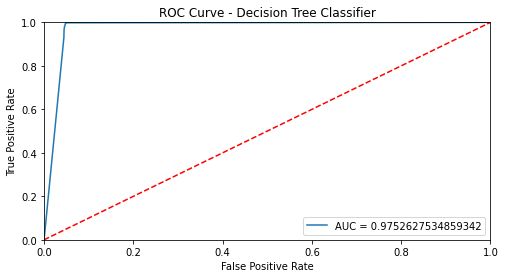

AUC score = 0.975
Precision Score: 0.9538832292693614
Accuracy: 0.9740766230786878
Recall Score: 0.9964526833733837
Confusion Matrix: 
 [[8276  421]
 [  31 8708]]


In [37]:
X = df_train_ms.drop('Claim',1)
y = df_train_ms.Claim

X_train,X_test,y_train,y_test = train_test_split(X_os,y_os,random_state = 0, test_size = 0.20)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# fit the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

# Plot ROC curve
false_pr, true_pr, threshold = roc_curve(y_test, y_prob[:,1])
plt.figure(figsize=(8,4))

# Calculate AUC score
auc = roc_auc_score(y_test, y_prob[:,1])
plt.plot(false_pr, true_pr,label="AUC = {}".format(auc))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree Classifier")
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()



print('AUC score = %.3f' % auc) 
print('Precision Score:', precision_score(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Recall Score:', recall_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

#### K-NN Classifier

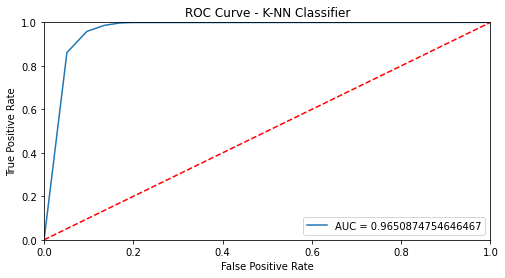

AUC score = 0.965
Precision Score: 0.8801062091503268
Accuracy: 0.9257283780683643
Recall Score: 0.9861540221993363
Confusion Matrix: 
 [[7523 1174]
 [ 121 8618]]


In [38]:
X = df_train_ms.drop('Claim',1)
y = df_train_ms.Claim

X_train,X_test,y_train,y_test = train_test_split(X_os,y_os,random_state = 0, test_size = 0.20)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# fit the model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

# Plot ROC curve
false_pr, true_pr, threshold = roc_curve(y_test, y_prob[:,1])
plt.figure(figsize=(8,4))

# Calculate AUC score
auc = roc_auc_score(y_test, y_prob[:,1])
plt.plot(false_pr, true_pr,label="AUC = {}".format(auc))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - K-NN Classifier")
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()


print('AUC score = %.3f' % auc) 
print('Precision Score:', precision_score(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Recall Score:', recall_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

#### Random Forest

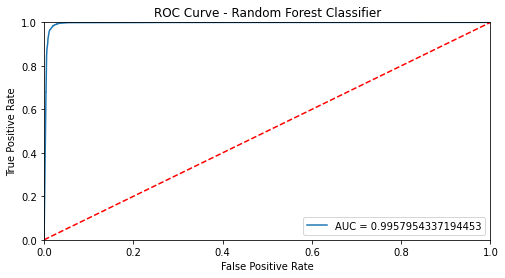

AUC score = 0.996
Precision Score: 0.9563548634718719
Accuracy: 0.9761413168157834
Recall Score: 0.9979402677651905
Confusion Matrix: 
 [[8299  398]
 [  18 8721]]


In [39]:
# Model building using Random Forest but by performing Random Over-Sampling on the training data 
X = df_train_ms.drop('Claim',1)
y = df_train_ms.Claim

X_train,X_test,y_train,y_test = train_test_split(X_os,y_os,random_state = 0, test_size = 0.20)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# fit the model
model = RandomForestClassifier(random_state = 0)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

# Plot ROC curve
false_pr, true_pr, threshold = roc_curve(y_test, y_prob[:,1])
plt.figure(figsize=(8,4))

# Calculate AUC score
auc = roc_auc_score(y_test, y_prob[:,1])
plt.plot(false_pr, true_pr,label="AUC = {}".format(auc))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest Classifier")
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()


print('AUC score = %.3f' % auc) 
print('Precision Score:', precision_score(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Recall Score:', recall_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

In [40]:
df_test_ms = pd.read_csv('../data/test.csv')

In [41]:
# Saving id's for sample output
id = df_test_ms.ID

In [42]:
df_test_ms.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age
0,17631,EPX,Travel Agency,Online,Cancellation Plan,192,HONG KONG,18.0,0.00,36
1,15064,EPX,Travel Agency,Online,1 way Comprehensive Plan,2,SINGAPORE,20.0,0.00,36
2,14139,C2B,Airlines,Online,Bronze Plan,13,SINGAPORE,13.5,3.38,24
3,19754,EPX,Travel Agency,Online,2 way Comprehensive Plan,133,"TAIWAN, PROVINCE OF CHINA",41.0,0.00,36
4,16439,C2B,Airlines,Online,Silver Plan,2,SINGAPORE,30.0,7.50,32


In [43]:
# Drop ID
df_test_ms.drop('ID',1,inplace = True)

# One Hot Encoding
ohe_test = df_test_ms.select_dtypes('object').columns.tolist()
for ohe in ohe_test:
    df_test_ms = pd.concat((df_test_ms,pd.get_dummies(df_test_ms[ohe])),1)
    df_test_ms.drop(ohe,1,inplace = True)

# Treating negative values in Duration column
df_test_ms.Duration.replace(-1,0, inplace = True)
df_test_ms.Duration.replace(-2,0, inplace = True)

# Skewed Columns
df_test_ms.loc[:,'Duration'] = np.power(df_test_ms.Duration, 0.15)

power = 0.25
Net_sales_value = df_test_ms.index
for index in Net_sales_value:
    if df_test_ms.loc[index,'Net Sales'] < 0:
        df_test_ms.loc[index,'Net Sales'] = -np.power(abs(df_test_ms.loc[index,'Net Sales']), power)
    else:
        df_test_ms.loc[index,'Net Sales'] = np.power(df_test_ms.loc[index,'Net Sales'], power)       

df_test_ms.loc[:,'Commision (in value)'] = np.power(df_test_ms['Commision (in value)'], 0.25)

# Scaler tranformation
df_test_ms = scaler.transform(df_test_ms)

# prediction
predicted_op = model.predict(df_test_ms)
# threshold tuned predictions 
output_ms = model.predict_proba(df_test_ms)[:,1]


In [44]:
#output_ms = (output_ms > 0.85).astype(int)#  - 0.84 GA
#output_ms = (output_ms > 0.90).astype(int) # - 0.86 GA
#output_ms = (output_ms > 0.95).astype(int) # - 0.88 GA
#output_ms = (output_ms > 0.96).astype(int) # - 0.90 GA
#output_ms = (output_ms > 0.97).astype(int)  #- 0.92 GA
#output_ms = (output_ms > 0.98).astype(int)  #- 0.94 GA
output_ms = (output_ms > 0.99).astype(int) #- 0.97 GA

In [45]:
final_result_ms = pd.DataFrame()
final_result_ms['ID'] = id
final_result_ms['Claim'] = output_ms


In [46]:
final_result_ms.Claim.value_counts()

0    22274
1      147
Name: Claim, dtype: int64

In [47]:
final_result_ms.to_csv('final_result_ms.csv',index = False)